# Challenge: http://www.pythonchallenge.com/pc/def/oxygen.html

In [1]:
%matplotlib inline
from urllib import request
import re
from IPython.display import Image
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'http://www.pythonchallenge.com/pc/def/{}'
with request.urlopen(url.format('oxygen.html')) as response:
    page = response.read().decode()
print(page)

<html>
<head>
  <title>smarty</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
	<br><br>
	<center>
	<img src="oxygen.png"/>
</body>
</html>



files/oxygen.png


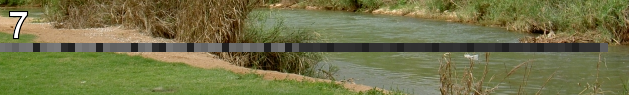

In [3]:
fname, headers = request.urlretrieve(url=url.format('oxygen.png'), filename='files/oxygen.png')
print(fname)
Image(fname)

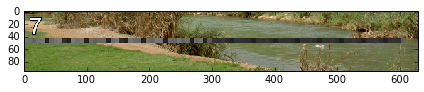

In [4]:
img = io.imread(fname)
io.imshow(img)

In [5]:
print(img.shape)

(95, 629, 4)


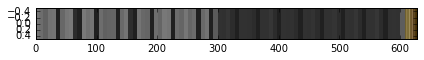

In [6]:
greyline = img[44:45, :, :]
io.imshow(greyline, aspect=50)

In [7]:
code = greyline.mean(axis=2).astype('int')[0]
code = greyline[0, 1::7, 0]
code

array([115, 109,  97, 114, 116,  32, 103, 117, 121,  44,  32, 121, 111,
       117,  32, 109,  97, 100, 101,  32, 105, 116,  46,  32, 116, 104,
       101,  32, 110, 101, 120, 116,  32, 108, 101, 118, 101, 108,  32,
       105, 115,  32,  91,  49,  48,  53,  44,  32,  49,  49,  48,  44,
        32,  49,  49,  54,  44,  32,  49,  48,  49,  44,  32,  49,  48,
        51,  44,  32,  49,  49,  52,  44,  32,  49,  48,  53,  44,  32,
        49,  49,  54,  44,  32,  49,  50,  49,  93, 140, 106,  74], dtype=uint8)

In [8]:
decode = lambda code: ''.join([chr(i) for i in code])
message = decode(code)
print(message)

smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]jJ


In [9]:
next_code = re.compile('\[.+\]').findall(message)[0]
print(next_code)
word = decode(eval(next_code))
print(word)

[105, 110, 116, 101, 103, 114, 105, 116, 121]
integrity


In [10]:
solution = url.format(word + '.html')
print("Solution:", solution)

Solution: http://www.pythonchallenge.com/pc/def/integrity.html
